# 14.1 Bit.ly 1.USA.gov 데이터

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [2]:
# 매 시간별 스냄샷 파일의 각 로우는 웹 데이터 형식으로 흔히 사용되는 JSON이다.

path='datasets/bitly_usagov/example.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [3]:
# json모듈의 loads함수를 이용해서 내려받은 샘플 파일을 한 줄씩 읽어 파이썬 사전 객체로 바꿔줌

import json
path=open('datasets/bitly_usagov/example.txt', 'rt', encoding='UTF8') # UnicodeDecodeError로 인해 수정함
records=[json.loads(line) for line in path] 

In [4]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

* 순수 파이썬으로 표준시간대 세어보기

In [13]:
# 이 데이터에서 가장 빈도가 높은 표준시간대(tz필드)를 구한다고 가정

time_zones=[rec['tz'] for rec in records]# 1. 리스트 표기법으로 표준시간대의 목록 가져오기
                                         # KeyError: records의 아이템 모두 표준시간대 필드를 가지고 있지 않음

KeyError: 'tz'

In [14]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec] # 2. if 'tz' in rec 을 추가해 tz필드가 있는지 검사
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [15]:
def get_counts(sequence):
    counts={}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [16]:
from collections import defaultdict # 파이썬 표준 라이브러리를 사용하여 더 간단하게 작성

def get_counts2(sequence):
    counts = defaultdict(int) # 값이 0으로 초기화된다.
    for x in sequence:
        counts[x] += 1
    return counts

In [17]:
counts = get_counts(time_zones)

In [18]:
counts['America/New_York']

1251

In [19]:
len(time_zones)

3440

In [20]:
# 가장 많이 등장하는 상위 10개의 표준시간대를 알고 싶다면 사전 사용

def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [21]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [22]:
# collections.Counter클래스를 이용하여 더 수월하게

from collections import Counter

In [23]:
counts=Counter(time_zones)

In [24]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

* pandas로 표준시간대 세어보기

In [25]:
# records로 DF만드려면 레코드가 담긴 리스트를 pandas.DataFrame로 넘기면 된다.

frame=pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [26]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [27]:
tz_counts = frame['tz'].value_counts() # frame['tz']에서 반환되는 Series객체는 value_counts메서드를 이용해 시간대 세어보기
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [28]:
# matplotlib 라이브러리로 그래프 그리기

clean_tz = frame['tz'].fillna('Missing') # records에서 비어있는 표준시간대를 다른 이름으로 바꾸기

In [29]:
clean_tz[clean_tz == ''] = 'Unknown' # 불리언 배열 색인을 이용하여 비어 있는 값 대체

In [30]:
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [31]:
import seaborn as sns # seaborn 패키지를 이용해 수평막대그래프 그리기

In [32]:
subset=tz_counts[:10]

<AxesSubplot:>

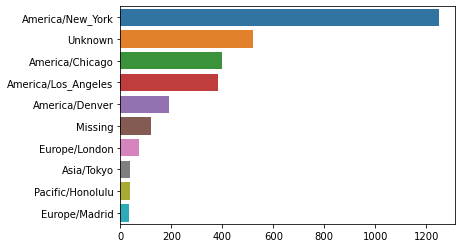

In [33]:
sns.barplot(y=subset.index, x=subset.values)

In [34]:
frame['a'][1] # a 필드에는 URL 단축을 실행하는 브라우저, 단말기, 애플리케이션에 대한 정보가 들어있다.

'GoogleMaps/RochesterNY'

In [35]:
frame['a'][51][:50]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [36]:
# 문자열 정보를 분석하려면 문자열에서 첫 번째 토큰(브라우저의 종류를 구분하게끔)을 잘라내서 사용자 행동에 대한 또 다른 개요 만들기

results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [37]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [38]:
# 표준시간대 순위표를 윈도우 사용자와 비윈도우 사용자 그룹으로 나누기

cframe=frame[frame.a.notnull()].copy() # 문자열이 'Windows'를 포함하면 윈도우 사용자라고 가정하며, 문자열 값이 없는 데이터는 제외
                                       # SettingWithCopyWarning로 copy() 추가

In [39]:
cframe['os']=np.where(cframe['a'].str.contains('Windows'), # 각 로우가 윈도우인지 아닌지 검사
                     'Windows', 'Not Windows')

In [40]:
by_tz_os = cframe.groupby(['tz','os']) # 표준시간대와 운영체제를 기준으로 데이터를 그룹으로 묶음

In [41]:
agg_counts=by_tz_os.size().unstack().fillna(0) # 그룹별 합계를 size함수로 계산하고 그 결과는 unstack함수를 이용해서 표로 재배치
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [42]:
# 전체 표준시간대의 순위 모으기

indexer=agg_counts.sum(1).argsort() 
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [43]:
count_subset = agg_counts.take(indexer[-10:]) # agg_counts에 take함수로 로우를 정렬된 순서 그대로 선택하고 마지막 10개 로우만 자름
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [44]:
agg_counts.sum(1).nlargest(10) # nlargest메서드로 수월하게

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [45]:
count_subset= count_subset.stack() # 시각화를 위해 재배치

In [46]:
count_subset.name='total'

In [47]:
count_subset=count_subset.reset_index()
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<AxesSubplot:xlabel='total', ylabel='tz'>

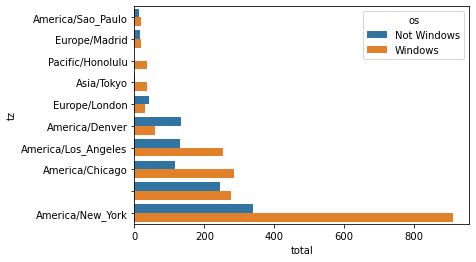

In [48]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

In [49]:
# 작은 그룹에서 윈도우 사용자의 상대 비율을 확인하기 위해 각 로우에서 총합을 1로 정규화

def norm_total(group):
    group['normed_total']=group.total/group.total.sum()
    return group

results=count_subset.groupby('tz').apply(norm_total)

<AxesSubplot:xlabel='normed_total', ylabel='tz'>

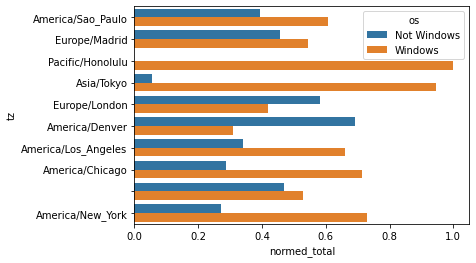

In [50]:
sns.barplot(x='normed_total', y='tz', hue='os', data=results)

In [51]:
# groupby와 transform 메서드를 이용해서 정규합 계산을 더 효율적으로 가능
g=count_subset.groupby('tz')
results2=count_subset.total / g.total.transform('sum')

# 14.2 MovieLens의 영화 평점 데이터

In [52]:
# 이 데이터에는 영화 평점과 영화 정보(장르, 개봉년도) 그리고 사용자 정보(나이, 우편번호, 성별, 직업)이 포함
# 각 테이블을 pandas.read_table 함수를 사용하여 DF 객체로 불러오기

In [53]:
pd.options.display.max_rows = 10

unames=['user_id', 'gender', 'age', 'occupation', 'zip']
users=pd.read_table('datasets/movielens/users.dat', sep='::',
                   header=None, names=unames)

rnames=['user_id', 'movie_id', 'rating', 'timestamp']
ratings=pd.read_table('datasets/movielens/ratings.dat', sep='::',
                     header=None, names=rnames)

mnames=['movie_id', 'title', 'genres']
movies=pd.read_table('datasets/movielens/movies.dat', sep='::',
                    header=None, names=mnames)

C:\Anaconda3\lib\site-packages\pandas\io\parsers.py:765: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


In [54]:
users[:5] # 나이와 직업은 실제값이 아닌 그룹을 가리키는 코드 번호

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [55]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [56]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [57]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [58]:
# 나이와 성별에 따른 어떤 영화의 평균 평점을 계산해보자

# 1. pandas의 merge함수를 이용해서 ratings테이블과 users테이블 병합
# 2. 그 결과를 다시 movies테이블과 병합
# 3. pandas는 병합하려는 두 테이블에서 중복되는 컬럼의 이름을 키로 사용

data=pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [59]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [60]:
mean_ratings=data.pivot_table('rating', index='title',   # 성별에 따른 각 영화의 평균 평점을 구하려면 pivot_table사용
                             columns='gender', aggfunc='mean') 
mean_ratings[:5] # 매 로우마다 성별에 따른 평균 영화 평점 정보를 잠고있는 DF

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [61]:
# 먼저 250건 이상의 평점 정보가 있는 영화만 추려보기

ratings_by_title = data.groupby('title').size() # 데이터를 제목으로 그룹화하고 size 함수로 제목별 평점 정보 건수를 Series객체로 얻음
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [62]:
active_titles=ratings_by_title.index[ratings_by_title >=250 ]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [63]:
mean_ratings = mean_ratings.loc[active_titles] # 영화 색인으로 로우 선택
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [64]:
top_female_ratings = mean_ratings.sort_values(by = 'F', ascending=False) # 여성에게 높은 평점을 받은 영화 목록 확인- F컬럼 내림차순
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


* 평점 차이 구하기

In [65]:
# 남녀 간의 호불호가 갈리는 영화를 찾아보기

mean_ratings['diff'] =mean_ratings['M'] - mean_ratings['F']

In [66]:
sorted_by_diff=mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [67]:
sorted_by_diff[-10:] # 역순으로 남성의 선호도 순 확인

gender,F,M,diff
title,,,
For a Few Dollars More (1965),3.409091,3.953795,0.544704
Caddyshack (1980),3.396135,3.969737,0.573602
Rocky III (1982),2.361702,2.943503,0.581801
"Hidden, The (1987)",3.137931,3.745098,0.607167
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
"Longest Day, The (1962)",3.411765,4.031447,0.619682
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359


In [68]:
rating_std_by_title = data.groupby('title')['rating'].std() # 성별의 상관없이 호불호가 나뉘는 영화 찾기- 표준편차로 측정

In [69]:
rating_std_by_title = rating_std_by_title.loc[active_titles] # active_titles만 선택

In [70]:
rating_std_by_title.sort_values(ascending=False)[:10] # 평점 내리차순으로 Series 정렬

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

# 14.3 신생아 이름

In [71]:
names1880 = pd.read_csv('datasets/babynames/yob1880.txt',
                       names=['name','sex','births'])
names1880 # 이 데이터는 각 연도별로 최소 5명 이상 중복되는 이름만 포함

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [72]:
names1880.groupby('sex').births.sum() # 편의상 성별별 출생수를 모두 합한 값을 해당 연도의 전체 출생수라 가정

sex
F     90993
M    110493
Name: births, dtype: int64

In [73]:
# 자료가 연도별 파일로 나뉘어져 있어 모든 데이터를 DataFrame하나로 모은 후 year항목 추가

years=range(1880,2011)

pieces=[]
columns=['name','sex','births']

for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year']=year
    pieces.append(frame)
    
names=pd.concat(pieces, ignore_index=True) # 하나의 DF로 합치기
# concat메서드는 DataFrame객체를 합쳐줌, read_csv로 읽어온 원래 로우 순서는 몰라도 되니 ignore_index=True를 인자로 전달

In [74]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [75]:
total_births=names.pivot_table('births', index='year', # pivot_table로 연도나 성별에 따른 데이터 수집 가능
                               columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

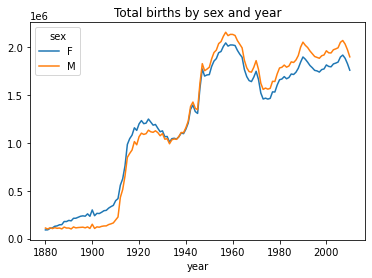

In [76]:
total_births.plot(title='Total births by sex and year') # 연도와 성별별 출산수

In [77]:
# prop컬럼을 추가하여 각 이름이 전체 출생수에서 차지하는 비율을 계산해보자
# prop값이 0.02라면 100명 중 2명의 이름이 같다는 뜻

def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names=names.groupby(['year','sex']).apply(add_prop) 

In [78]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [79]:
names.groupby(['year','sex']).prop.sum() # prop의 합이 1이 맞는지 새너티 테스트 실행

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [80]:
# 분석에 사용할 각 연도별/성별에 따른 선호하는 이름 1,000개 추출

def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped=names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)

top1000.reset_index(inplace=True, drop=True) # 그룹 색인은 필요없으므로 삭제

pieces=[]
for year, group in names.groupby(['year','sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])

top1000=pd.concat(pieces, ignore_index=True)

In [81]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


* 이름 유행 분석

In [82]:
# 전체 데이터셋과 상위 1,000개의 이름 데이터로 흥미로운 이름 유행을 분석해보자

boys=top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F'] # 상위 1000개의 데이터를 남자아이와 여자아이로 분리

In [83]:
total_births=top1000.pivot_table('births', index='year',
                                columns='name',
                                aggfunc=sum) # 연도와 이름에 대한 전체 출생수를 피벗테이블로 만들기

In [84]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [85]:
subset=total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

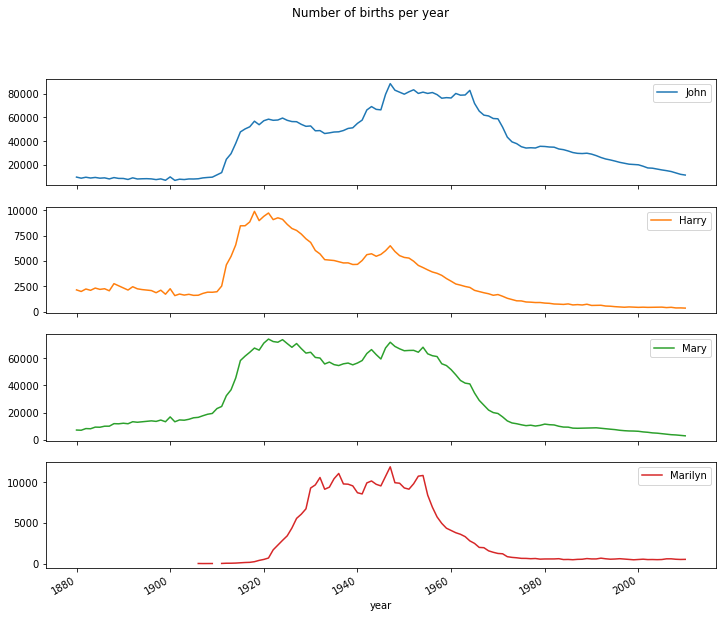

In [86]:
subset.plot(subplots=True, figsize=(12,10), grid=False,
           title="Number of births per year") # 몇몇 이름의 추이를 그래프로 그려보자

* 다양한 이름을 사용하는 경향 측정하기

In [87]:
# 인기 있는 이름 1000개가 전체 츨생수에서 차지하는 비율을 연도별/성별 그래프로 그려보자

table = top1000.pivot_table('prop', index='year',
                           columns='sex', aggfunc=sum)

<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

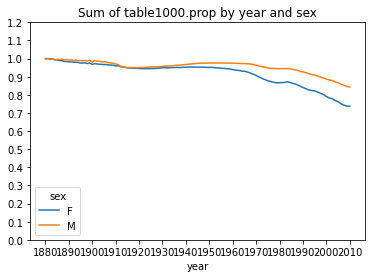

In [88]:
table.plot(title='Sum of table1000.prop by year and sex',
          yticks=np.linspace(0,1.2,13),
          xticks=range(1880, 2020, 10))
# 이름의 다양성이 증가하고 있음을 보여줌 (상위 1000개의 이름에서 비율의 총합이 감소)

In [89]:
df=boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [90]:
# 인기 있는 이름 순으로 정렬했을 때 전체 출생 수의 50%를 차지하기까지 등장하는 이름 수 구하기

prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum() # prop의 누계를 cumsum에 저장하고
prop_cumsum[:10] # 

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [91]:
prop_cumsum.values.searchsorted(0.5) # searchsorted 메서드를 호출해서 정렬된 상태에서 누계가 0.5가 되는 위치 구한다.

116

In [92]:
df=boys[boys.year == 1900]

In [93]:
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [94]:
in1900.values.searchsorted(0.5)+1 # 배열의 색인은 0부터 시작하기 때문에 결과에 1을 더한다.

25

In [95]:
# 이 연산을 각 연도별/성별 조합에 적용 가능

def get_quantile_count(group, q=0.5):
    group=group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count) # 연도와 성을 groupby로 묶고 apply로 연산을 적용
diversity = diversity.unstack('sex')

In [96]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

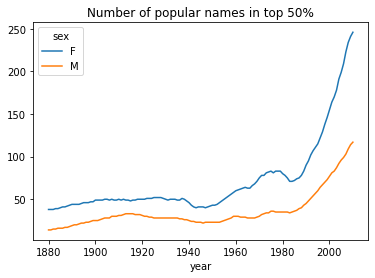

In [97]:
diversity.plot(title="Number of popular names in top 50%") # 연도별 이름 다양성 지수

* '마지막 글자'의 변화

In [99]:
# 전체 자료에서 연도, 성별, 이름의 마지막 글자를 수집해서 남자아이 이름의 마지막 글자의 분포에 중요한 변화 확인

get_last_letter = lambda x: x[-1] # name컬럼에서 마지막 글자 추출
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,
                         columns=['sex', 'year'], aggfunc=sum)

In [100]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [101]:
subtable.sum() 

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [102]:
letter_prop = subtable/subtable.sum() # 전체 출생수에서 성별 각각의 마지막 글자가 차지하는 비율을 계산하기 위해 전체출생수로 정규화
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

<AxesSubplot:title={'center':'Female'}, xlabel='last_letter'>

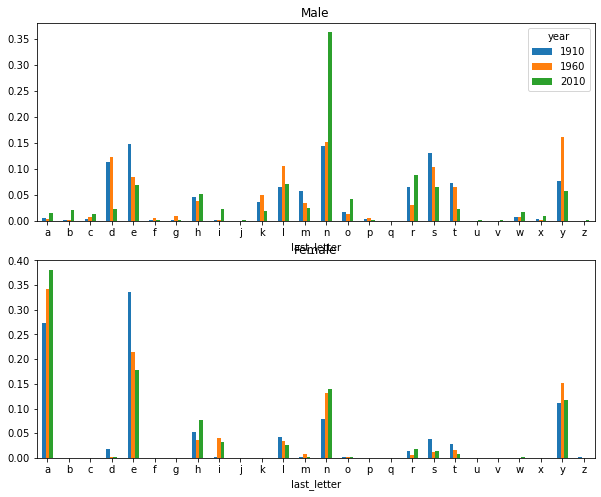

In [104]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False) 

In [105]:
# 'n'으로 끝나는 남자아이 이름의 빈도가 1960년도 이후에 급격히 증가

In [106]:
# 세 지점이 아닌 전체 자료에 대해 출생연도와 성별, 남자아이 이름에서 몇가지 글자로 정규화하고 시계열 데이터로 변환

letter_prop = table/table.sum()

In [107]:
dny_ts=letter_prop.loc[['d','n','y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


<AxesSubplot:xlabel='year'>

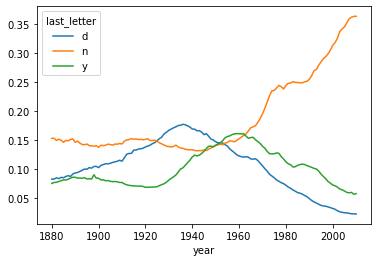

In [108]:
dny_ts.plot()

* 남자 이름과 여자 이름이 바뀐 경우

In [109]:
# top1000 데이터를 이용해서 'lesl'로 시작하는 이름을 포함하는 목록을 만들어보자

all_names = pd.Series(top1000.name.unique())

In [110]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [111]:
filtered=top1000[top1000.name.isin(lesley_like)] # 위 이름들만 걸러내어 이름별로 출생수를 구하고 상대도수 확인

In [112]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [113]:
table=filtered.pivot_table('births', index='year',  # 성별과 연도별로 모은 다음 출생연도로 정규화
                          columns='sex', aggfunc='sum')

In [114]:
table=table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


<AxesSubplot:xlabel='year'>

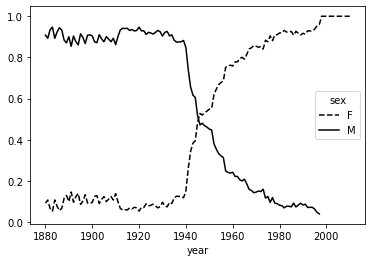

In [115]:
table.plot(style={'M':'k-', 'F':'k--'}) # 시대별로 성별에 따른 명세를 그래프로 그려보기

# 14.4 미국농무부 영양소 정보

In [116]:
import json

In [117]:
db=json.load(open('datasets/usda_food/database.json'))

In [118]:
len(db)

6636

In [119]:
db[0].keys() # db에 있는 각 엔트리는 한 가지 음식에 대한 모든 정보를 담고 있는 사전형

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [120]:
db[0]['nutrients'][0] # 'nutrients'필드는 사전의 리스트이며 각 항목은 한 가지 영양소에 대한 정보를 담고 있다.

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [121]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients[:7]

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


In [122]:
info_keys = ['description', 'group', 'id', 'manufacturer'] # 사전의 리스트를 DataFrame으로 바꿀 때 추출할 필드 목록 지정 가능

In [123]:
info=pd.DataFrame(db, columns=info_keys)
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [124]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [125]:
pd.value_counts(info.group)[:10] # value_counts메서드를 이용해서 음식 그룹의 분포 확인 가능

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [126]:
# 모든 영양소 정보를 좀 더 쉽게 분석하려면 각 음식의 영양소 정보를 거대한 테이블 하나에 담으려면
# 1. 먼저 음식의 영양소 리스트를 하나의 DataFrame으로 변환하고, 음식의 id를 위한 컬럼 추가
# 2. 이 DataFrame을 리스트에 추가
# 3. 리스트를 concat메서드를 사용하여 하나로 합치기

nutrients # id가 왜 없지.......

,value,units,description,group
0,25.180,g,Protein,Composition
1,29.200,g,Total lipid (fat),Composition
2,3.060,g,"Carbohydrate, by difference",Composition
3,3.280,g,Ash,Other
4,376.000,kcal,Energy,Energy
...,...,...,...,...
157,1.472,g,Serine,Amino Acids
158,93.000,mg,Cholesterol,Other
159,18.584,g,"Fatty acids, total saturated",Other
160,8.275,g,"Fatty acids, total monounsaturated",Other


In [127]:
nutrients.duplicated().sum() # 중복 확인

108

In [128]:
nutrients=nutrients.drop_duplicates() # 중복 제거

In [129]:
col_mapping={'description': 'food',
            'group': 'fgroup'}  # 'group'과 'description'은 모두 DataFrame 객체므로 구분을 쉽게 하기 위해 이름 바꾸기

In [130]:
info = info.rename(columns=col_mapping, copy=False)
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [131]:
col_mapping={'description':'nutrient',
            'group':'nutgroup'}

In [132]:
nutrients=nutrients.rename(columns=col_mapping, copy=False)
nutrients

,value,units,nutrient,nutgroup
0,25.180,g,Protein,Composition
1,29.200,g,Total lipid (fat),Composition
2,3.060,g,"Carbohydrate, by difference",Composition
3,3.280,g,Ash,Other
4,376.000,kcal,Energy,Energy
...,...,...,...,...
49,1.618,g,Aspartic acid,Amino Acids
50,6.160,g,Glutamic acid,Amino Acids
51,0.439,g,Glycine,Amino Acids
52,2.838,g,Proline,Amino Acids


In [134]:
ndata=pd.merge(nutrients,info,on='id',how='outer') # info객체를 nutrients객체로 병합
ndata.info() # nutrients에 'id'가 없어서 오류

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

# 14.5 2012년 연방선거관리위원회 데이터베이스

In [135]:
# 미국연방선거관리위원회에서 정치활동 후원금에 대한 데이터 공개- 기부자의 이름, 직업, 고용형태, 주소, 기부금액 포함
# 2012년 미국 대통령 선거데이터를 살펴보자

fec=pd.read_csv('datasets/fec/P00000001-ALL.csv')
fec.info()

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [136]:
fec.iloc[123456]

cmte_id             C00431445
cand_id             P80003338
cand_nm         Obama, Barack
contbr_nm         ELLMAN, IRA
contbr_city             TEMPE
                    ...      
receipt_desc              NaN
memo_cd                   NaN
memo_text                 NaN
form_tp                 SA17A
file_num               772372
Name: 123456, Length: 16, dtype: object

In [137]:
# 기부자와 선거 자금에서 찾을 수 있는 패턴에 대한 통계를 추출하기 위해 이 데이터를 적당한 크기로 쪼개서 나누는 다양한 방법 존재

unique_cands = fec.cand_nm.unique() # unique메서드를 이용해서 모든 정당의 후보 목록 얻기
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [138]:
unique_cands[2]

'Obama, Barack'

In [139]:
parties= {'Bachmann, Michelle':'Republican',
         'Cain, Herman': 'Republican',
         'Gingrich, Newt':'Republican',
         'Huntsman, Jon':'Republican',
         'Johnson, Gary Earl':'Republican',
         'McCotter, Thaddeus G': 'Republican',
         'Obama, Barack':'Democrat',
         'Paul, Ron':'Republican',
         'Pawlenty, Timothy':'Republican',
         'Perry, Rick':'Republican',
         "Romer, Charles E. 'Buddy' III":'Republican',
         'Romney, Mitt':'Republican',
         'Santorum, Rick':'Republican'}

In [140]:
fec.cand_nm[123456:123461] 

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [141]:
fec.cand_nm[123456:123461].map(parties) # 사전 정보와 Series객체의 map메서드를 사용해 후보 이름으로부터 정당 배열 계산

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [142]:
fec['party'] = fec.cand_nm.map(parties) # party컬럼으로 추가

In [143]:
fec['party'].value_counts()

Democrat      593746
Republican    402065
Name: party, dtype: int64

In [145]:
# 분석 전 데이터를 다듬기

(fec.contb_receipt_amt > 0).value_counts() # 데이터에 기부금액과 환급금액이 함께 포함

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [146]:
fec = fec[fec.contb_receipt_amt > 0] # 분석의 단순화를 위해 기부금액이 양수인 데이터만 골라내기

In [147]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack','Romney, Mitt'])] # 버락 오바마와 미트 롬니, 두 후보의 기부금액 정보만 따로 추려내기

* 직업 및 고용주에 따른 기부 통계

In [148]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [155]:
# 같은 유형의 직업, 고용주를 하나의 이름으로 합치기- 하나의 직업, 고용주를 다른 직업, 고용주로 매핑

occ_mapping = {
    'INFORMATION REQUEST PER BEST EFFORTS':'NOT PROVIDED',
    'INFORMATION REQUEST':'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
    'C.E.O.':'CEO'
}

f =lambda x: occ_mapping.get(x, x) # mapping이 없다면 x반환
fec.contbr_occupation=fec.contbr_occupation.map(f).copy()

In [156]:
emp_mapping = {
    'INFORMATION REQUEST PER BEST EFFORTS':'NOT PROVIDED',
    'INFORMATION REQUEST':'NOT PROVIDED',
    'SELF':'SELF-EMPLOYED',
    'SELF EMPLOYED':'SELF-EMPLOYED'
}

f =lambda x: emp_mapping.get(x, x) # mapping이 없다면 x반환
fec.contbr_employer=fec.contbr_employer.map(f).copy()

In [157]:
# pivot_table을 사용하여 정당과 직업별로 데이터를 집계한 후 최소 2백만불 이상 기부한 직업만 골라내기

by_occupation = fec.pivot_table('contb_receipt_amt',
                               index='contbr_occupation',
                               columns='party',
                               aggfunc='sum')

In [158]:
over_2mm=by_occupation[by_occupation.sum(1)>2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.462058e+06
CEO,2075974.79,4.231652e+06
CONSULTANT,2459912.71,2.538990e+06
ENGINEER,951525.55,1.811937e+06
EXECUTIVE,1355161.05,4.136400e+06
...,...,...
PRESIDENT,1878509.95,4.717414e+06
PROFESSOR,2165071.08,2.940327e+05
REAL ESTATE,528902.09,1.624507e+06


<AxesSubplot:ylabel='contbr_occupation'>

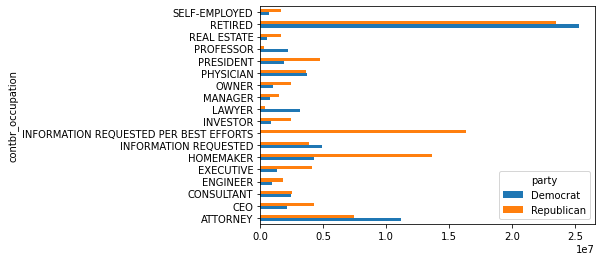

In [159]:
over_2mm.plot(kind='barh')

In [160]:
# 오바마 후ㅜ보와 롬니 후보별로 가장 많이 기부한 직군을 알아보자- 후보 이름으로 그룹을 묶고 변형된 top메서드 사용

def get_top_amounts(group, key, n=5):
    totals=group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [161]:
grouped=fec_mrbo.groupby('cand_nm')

In [162]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation    
Obama, Barack  RETIRED                  25305116.38
               ATTORNEY                 11141982.97
               INFORMATION REQUESTED     4866973.96
               HOMEMAKER                 4248875.80
               PHYSICIAN                 3735124.94
                                           ...     
Romney, Mitt   HOMEMAKER                 8147446.22
               ATTORNEY                  5364718.82
               PRESIDENT                 2491244.89
               EXECUTIVE                 2300947.03
               C.E.O.                    1968386.11
Name: contb_receipt_amt, Length: 14, dtype: float64

In [163]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer      
Obama, Barack  RETIRED                  22694358.85
               SELF-EMPLOYED            17080985.96
               NOT EMPLOYED              8586308.70
               INFORMATION REQUESTED     5053480.37
               HOMEMAKER                 2605408.54
                                           ...     
Romney, Mitt   CREDIT SUISSE              281150.00
               MORGAN STANLEY             267266.00
               GOLDMAN SACH & CO.         238250.00
               BARCLAYS CAPITAL           162750.00
               H.I.G. CAPITAL             139500.00
Name: contb_receipt_amt, Length: 20, dtype: float64

* 기부금액

In [164]:
# 이 데이터를 효과적으로 분석하려면 cut함수로 기부 규모별로 버킷을 만들어 기부자 수를 분할하는 것

bins=np.array([0,1,10,100,1000,10000,100000,1000000,100000000])

In [166]:
labels=pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 100000000]]

In [167]:
grouped=fec_mrbo.groupby(['cand_nm', labels]) # 이름과 버킷 이름으로 그룹지어 기부금액 규모에 따른 히스토그램 그리기 가능
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 100000000]",4,0


In [168]:
bucket_sums=grouped.contb_receipt_amt.sum().unstack(0)

In [169]:
nored_sums=bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
nored_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 100000000]",1.000000,NaN


<AxesSubplot:ylabel='contb_receipt_amt'>

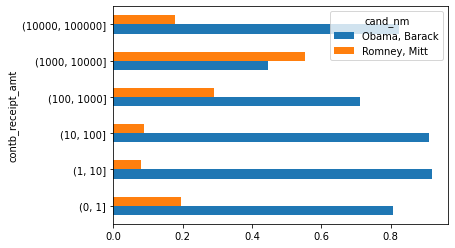

In [172]:
nored_sums[:-2].plot(kind='barh')

* 주별 기부 통계

In [173]:
grouped=fec_mrbo.groupby(['cand_nm', 'contbr_st'])

In [174]:
totals=grouped.contb_receipt_amt.sum().unstack(0).fillna(0)

In [175]:
totals=totals[totals.sum(1)>100000]

In [176]:
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [177]:
percent=totals.div(totals.sum(1), axis=0) # 각 로우를 전체 기부금액으로 나누면 각 후보에 대한 주별 전체 기부금액의 상대적 비율
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
